Amazon_cloths sells cloths online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.
Following is predict is analysis for this company

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).


Read in the Ecommerce Customers csv file as a DataFrame called customers.

In [38]:
#importing necessary files
import pandas as pd
import seaborn as sns

In [39]:
#reading Ecommerce Customers.txt files into dataframe
customer=pd.read_csv("Ecommerce Customers.txt")
customer.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

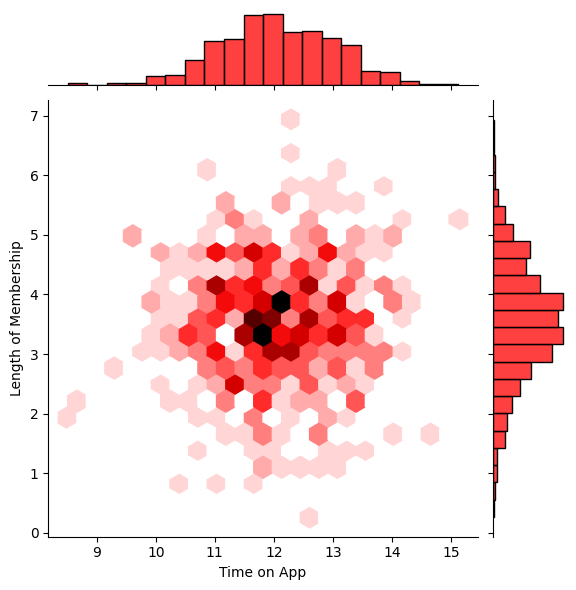

In [40]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customer, color='red', kind = 'hex')

explore these types of relationships across the entire data set

In [41]:
# Generate a pairplot to visualize pairwise relationships in the DataFrame 'customer'
sns.pairplot(customer)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


<Axes: >

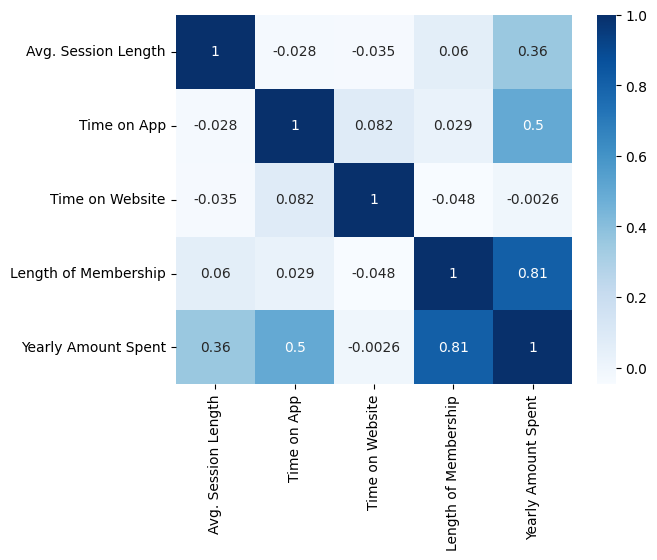

In [ ]:
# # Select only numeric columns from the DataFrame
numeric_customer = customer.select_dtypes(include=['int64', 'float64'])  #as there were strings too, so to avoid those data 
                                                                         #we have used datatype selection(select_dtypes)

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_customer.corr()

print(correlation_matrix['Yearly Amount Spent'].sort_values(ascending=False))

# Create a heatmap of the correlation matrix for the numeric columns
sns.heatmap(numeric_customer.corr(), cmap="Blues", annot=True)  


Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.

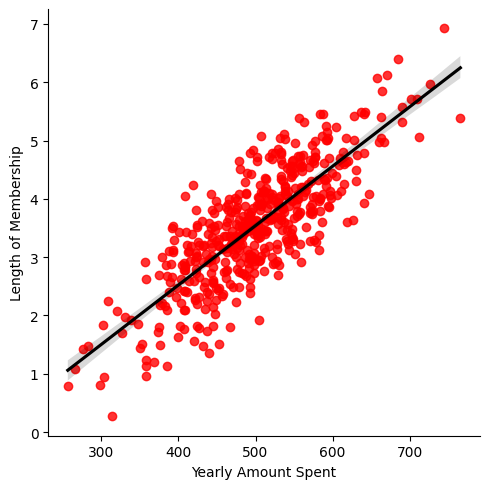

In [ ]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership',data=customer, scatter_kws={'color': 'red'}, line_kws={'color': 'black'})

Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. 

In [ ]:
X=customer[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [ ]:
y=customer['Yearly Amount Spent']
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=101)

Training the Model

Now its time to train our model on our training data!

In [ ]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lin_model = LinearRegression()

In [ ]:
lin_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#predicting the model on test data
predictions=lin_model.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

Create a scatterplot of the real test values versus the predicted values.

Text(0, 0.5, 'Predicted Y')

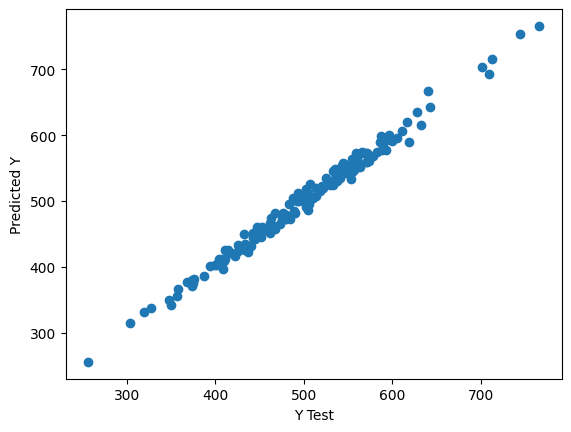

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test,y=predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [ ]:
from sklearn import metrics
import numpy as np
from math import sqrt
print('Mean Absolute Error is:',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error is:',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error is: 7.228148653430826
Mean Squared Error is: 79.81305165097427
Root Mean Squared Error: 8.933815066978624


Residuals

Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist()

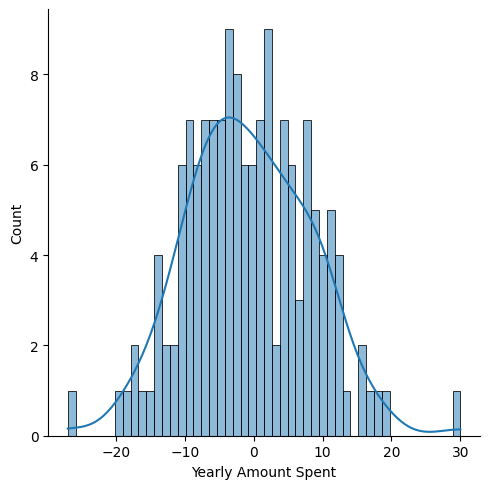

In [ ]:
# Plot the distribution of residuals using displot
sns.displot((y_test - predictions), bins=50, kde=True)

Conclusion

We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [ ]:
df = pd.DataFrame( data = lin_model.coef_, columns = ['Coefficient'] ,index = X_train.columns)
df.head()

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Do you think the company should focus more on their mobile app or on their website?

Company should focus more on Mobile application instead of their website as time on app is greater than time on website